##### We have 22 features in total. Out of them only 11 features are directly affecting the target.

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

# Import data
customer_data = pd.read_csv('E:/aaaML Projects/data/train.csv')
customer_data.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


In [2]:
train = customer_data.loc[:,['Gender', 'DOB', 'Employer_Category1', 'Employer_Category2', 'Monthly_Income', 'Primary_Bank_Type', 'Contacted', 'Source_Category', 'Loan_Amount', 'Loan_Period', 'Approved']]
train.head()

,Gender,DOB,Employer_Category1,Employer_Category2,Monthly_Income,Primary_Bank_Type,Contacted,Source_Category,Loan_Amount,Loan_Period,Approved
0,Female,23/07/79,A,4.0,2000.0,P,N,G,NaN,NaN,0
1,Male,07/12/86,C,1.0,3500.0,P,Y,G,20000.0,2.0,0
2,Male,10/12/82,C,4.0,2250.0,G,Y,B,45000.0,4.0,0
3,Male,30/01/89,A,4.0,3500.0,G,Y,B,92000.0,5.0,0
4,Male,19/04/85,A,4.0,10000.0,P,Y,B,50000.0,2.0,0


In [3]:
# Converting inconsistant date formats to proper datetime format
temp = train.loc[:,'DOB']
train.loc[:,'DOB'] = pd.to_datetime(temp)
train.head()

,Gender,DOB,Employer_Category1,Employer_Category2,Monthly_Income,Primary_Bank_Type,Contacted,Source_Category,Loan_Amount,Loan_Period,Approved
0,Female,1979-07-23,A,4.0,2000.0,P,N,G,NaN,NaN,0
1,Male,1986-07-12,C,1.0,3500.0,P,Y,G,20000.0,2.0,0
2,Male,1982-10-12,C,4.0,2250.0,G,Y,B,45000.0,4.0,0
3,Male,1989-01-30,A,4.0,3500.0,G,Y,B,92000.0,5.0,0
4,Male,1985-04-19,A,4.0,10000.0,P,Y,B,50000.0,2.0,0


In [4]:
from datetime import date
import datetime as DT

# Adding 'Age' feature
today = pd.Timestamp(DT.datetime.now())
age = (today - train['DOB']).astype('<m8[Y]')

train.insert(loc=2, column='Age', value=age)

# Setting negative age values to 0
train[train['Age']<0] =0

train = train.drop(['DOB'], axis=1)

train.head()

,Gender,Age,Employer_Category1,Employer_Category2,Monthly_Income,Primary_Bank_Type,Contacted,Source_Category,Loan_Amount,Loan_Period,Approved
0,Female,38.0,A,4.0,2000.0,P,N,G,NaN,NaN,0
1,Male,31.0,C,1.0,3500.0,P,Y,G,20000.0,2.0,0
2,Male,35.0,C,4.0,2250.0,G,Y,B,45000.0,4.0,0
3,Male,28.0,A,4.0,3500.0,G,Y,B,92000.0,5.0,0
4,Male,32.0,A,4.0,10000.0,P,Y,B,50000.0,2.0,0


### Exploratory analysis

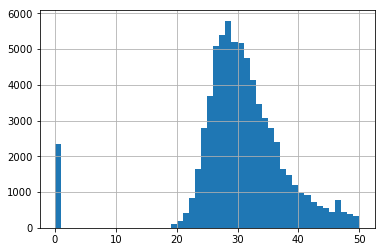

In [5]:
train['Age'].hist(bins=50);

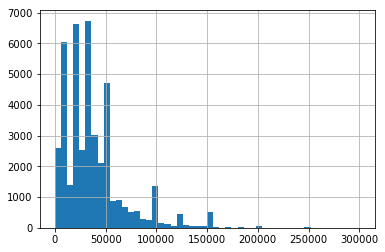

In [6]:
train['Loan_Amount'].hist(bins=50);

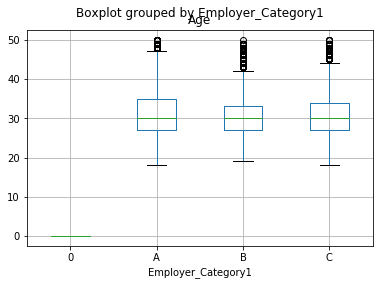

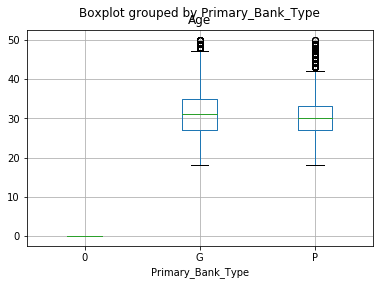

In [7]:
# To understand the distribution of the data
# There are quiet a few outliers/extreme values

train.boxplot(column='Age', by ='Employer_Category1');
train.boxplot(column='Age', by ='Primary_Bank_Type');

#### Filling in Missing values

In [8]:
train.apply(lambda x:sum(x.isnull()),axis=0)

Gender                    0
Age                      15
Employer_Category1     3763
Employer_Category2     4039
Monthly_Income            0
Primary_Bank_Type      8925
Contacted                 0
Source_Category           0
Loan_Amount           26884
Loan_Period           26884
Approved                  0
dtype: int64

In [9]:
train['Employer_Category1'].fillna('D', inplace=True)
train['Primary_Bank_Type'].fillna(3, inplace=True)

train = train.fillna(0)
train.apply(lambda x:sum(x.isnull()),axis=0)

Gender                0
Age                   0
Employer_Category1    0
Employer_Category2    0
Monthly_Income        0
Primary_Bank_Type     0
Contacted             0
Source_Category       0
Loan_Amount           0
Loan_Period           0
Approved              0
dtype: int64

In [10]:
# Encoding Categorical values

from sklearn.preprocessing import LabelEncoder

col_encode = ['Gender','Employer_Category1','Primary_Bank_Type','Contacted','Source_Category']

encoder = LabelEncoder()

for i in col_encode:
    train[i] = encoder.fit_transform(train[i].astype(str))
    
train.dtypes

Gender                  int64
Age                   float64
Employer_Category1      int64
Employer_Category2    float64
Monthly_Income        float64
Primary_Bank_Type       int64
Contacted               int64
Source_Category         int64
Loan_Amount           float64
Loan_Period           float64
Approved                int64
dtype: object

In [11]:
train.head()

,Gender,Age,Employer_Category1,Employer_Category2,Monthly_Income,Primary_Bank_Type,Contacted,Source_Category,Loan_Amount,Loan_Period,Approved
0,1,38.0,1,4.0,2000.0,3,1,7,0.0,0.0,0
1,2,31.0,3,1.0,3500.0,3,2,7,20000.0,2.0,0
2,2,35.0,3,4.0,2250.0,2,2,2,45000.0,4.0,0
3,2,28.0,1,4.0,3500.0,2,2,2,92000.0,5.0,0
4,2,32.0,1,4.0,10000.0,3,2,2,50000.0,2.0,0


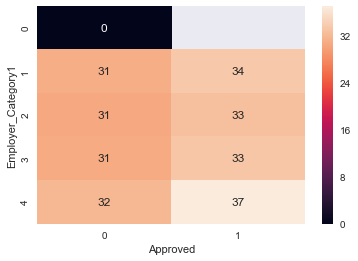

In [12]:
# Looking at correlation between features and target

import seaborn as sns

sns.set()

#names = ['Gender', 'Age', 'Employer_Category1', 'Employer_Category2', 'Monthly_Income', 'Primary_Bank_Type', 'Contacted', 'Source_Category', 'Loan_Amount', 'Loan_Period']

pivot = train.pivot_table(index = "Employer_Category1", columns = 'Approved', values = 'Age')

sns.heatmap(pivot, annot=True);

In [13]:
# Using Logistic regression and Correlation to estimate feature importance

print (train.corr())

                      Gender       Age  Employer_Category1  \
Gender              1.000000  0.421729            0.249471   
Age                 0.421729  1.000000            0.243554   
Employer_Category1  0.249471  0.243554            1.000000   
Employer_Category2  0.164716  0.333559           -0.220059   
Monthly_Income      0.013603  0.010635           -0.000364   
Primary_Bank_Type   0.270554  0.326918            0.128869   
Contacted           0.890510  0.445983            0.235420   
Source_Category     0.185967  0.209296            0.248345   
Loan_Amount         0.481562  0.195552           -0.011385   
Loan_Period         0.683990  0.215481           -0.031360   
Approved            0.051334  0.049082            0.021733   

                    Employer_Category2  Monthly_Income  Primary_Bank_Type  \
Gender                        0.164716        0.013603           0.270554   
Age                           0.333559        0.010635           0.326918   
Employer_Category1      

In [14]:
X=train.iloc[:, 0:10]
Y=train.iloc[:, 10]

In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % (fit.n_features_,))
print("Selected Features: %s" % (fit.support_,))
print("Feature Ranking: %s" % (fit.ranking_,))

Num Features: 3
Selected Features: [ True False False False False  True  True False False False]
Feature Ranking: [1 5 2 4 8 1 1 6 7 3]


As we can see from both the above methods between Target variable and the features, most correlated to target variable is Primary_Bank_Type.

In [16]:
test1 = pd.read_csv('E:/aaaML Projects/data/test.csv')
test = test1.loc[:,['Gender', 'DOB', 'Employer_Category1', 'Employer_Category2', 'Monthly_Income', 'Primary_Bank_Type', 'Contacted', 'Source_Category', 'Loan_Amount', 'Loan_Period']]

In [17]:
from datetime import date
import datetime as DT

temp = test.loc[:,'DOB']
test.loc[:,'DOB'] = pd.to_datetime(temp)

# Adding 'Age' feature
today = pd.Timestamp(DT.datetime.now())
age = (today - test['DOB']).astype('<m8[Y]')

test.insert(loc=2, column='Age', value=age)

# Setting negative age values to 0
test[test['Age']<0] =0

test = test.drop(['DOB'], axis=1)

test.head()

,Gender,Age,Employer_Category1,Employer_Category2,Monthly_Income,Primary_Bank_Type,Contacted,Source_Category,Loan_Amount,Loan_Period
0,Male,29.0,A,4.0,2150.0,P,Y,B,10000.0,3.0
1,Male,36.0,C,4.0,4200.0,P,Y,C,69000.0,5.0
2,Female,27.0,B,4.0,1000.0,P,N,B,NaN,NaN
3,Female,25.0,A,3.0,1465.0,P,N,C,NaN,NaN
4,Male,29.0,A,4.0,2340.0,P,Y,B,10000.0,2.0


In [18]:
test.apply(lambda x:sum(x.isnull()),axis=0)

Gender                    0
Age                       3
Employer_Category1     1492
Employer_Category2     1580
Monthly_Income            0
Primary_Bank_Type      3833
Contacted                 0
Source_Category           0
Loan_Amount           11515
Loan_Period           11515
dtype: int64

In [19]:
test['Employer_Category1'].fillna('D', inplace=True)
test['Primary_Bank_Type'].fillna(3, inplace=True)

test = test.fillna(0)
test.apply(lambda x:sum(x.isnull()),axis=0)

Gender                0
Age                   0
Employer_Category1    0
Employer_Category2    0
Monthly_Income        0
Primary_Bank_Type     0
Contacted             0
Source_Category       0
Loan_Amount           0
Loan_Period           0
dtype: int64

In [20]:
# Encoding Categorical values

from sklearn.preprocessing import LabelEncoder

col_encode = ['Gender','Employer_Category1','Primary_Bank_Type','Contacted','Source_Category']

encoder = LabelEncoder()

for i in col_encode:
    test[i] = encoder.fit_transform(test[i].astype(str))
    
test.dtypes

Gender                  int64
Age                   float64
Employer_Category1      int64
Employer_Category2    float64
Monthly_Income        float64
Primary_Bank_Type       int64
Contacted               int64
Source_Category         int64
Loan_Amount           float64
Loan_Period           float64
dtype: object

In [21]:
test.head()

,Gender,Age,Employer_Category1,Employer_Category2,Monthly_Income,Primary_Bank_Type,Contacted,Source_Category,Loan_Amount,Loan_Period
0,2,29.0,1,4.0,2150.0,3,2,2,10000.0,3.0
1,2,36.0,3,4.0,4200.0,3,2,3,69000.0,5.0
2,1,27.0,2,4.0,1000.0,3,1,2,0.0,0.0
3,1,25.0,1,3.0,1465.0,3,1,3,0.0,0.0
4,2,29.0,1,4.0,2340.0,3,2,2,10000.0,2.0


In [22]:
def cross_validate(model, X, Y, measure, folds):
    shuffle = cross_validation.KFold(len(X), n_folds=folds, shuffle=True)
    scores = cross_val_score(model, X, Y, cv=shuffle, scoring=measure)
    print (scores)

#### Model fitting

In [23]:
#Import models from scikit learn module

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
from sklearn import metrics

logisticreg = LogisticRegression()
cross_validate(logisticreg, X, Y, 'roc_auc', 3)

C:\Users\Archana\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[ 0.59517261  0.62271388  0.52652381]


In [24]:
decisiontree =  DecisionTreeClassifier()
cross_validate(decisiontree, X, Y, 'roc_auc', 3)

[ 0.52487432  0.52119742  0.52503157]


In [25]:
randomforest = RandomForestClassifier(n_estimators=100)
cross_validate(decisiontree, X, Y, 'roc_auc', 3)

[ 0.50658111  0.51985789  0.52213088]


In [26]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=100)
cross_validate(adaboost, X, Y, 'roc_auc', 3)

[ 0.83350377  0.81078797  0.83511779]


In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gradboost = GradientBoostingClassifier(n_estimators=100)
cross_validate(gradboost, X, Y, 'roc_auc', 3)

[ 0.83131076  0.83926127  0.82781496]


In [28]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

est = GradientBoostingClassifier(n_estimators=200, max_depth=3)
cross_validate(est, X, Y, 'roc_auc', 3)

[ 0.83186076  0.8439699   0.82060489]


In [37]:
import xgboost as xgb

gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
cross_validate(est, X, Y, 'roc_auc', 3)

[ 0.81273739  0.80630172  0.80584571]


In [38]:
gbm.fit(X, Y)
predictions = gbm.predict(test)
print (predictions.mean())

0.0


#### Ensemble method

In [29]:
from sklearn.ensemble import VotingClassifier

# sub models
estimators = []
model1 = AdaBoostClassifier(n_estimators=100)
estimators.append(('adaboost', model1))
model2 = GradientBoostingClassifier(n_estimators=100)
estimators.append(('gradboost', model2))
estimators.append(('xgboost', gbm))

# ensemble model
ensemble = VotingClassifier(estimators)
accuracy = cross_val_score(ensemble, X, Y, cv=10)
print(accuracy.mean())

0.985870648082


In [30]:
ensemble.fit(X,Y)
y_pred = ensemble.predict(test)

In [31]:
vc = VotingClassifier(estimators,
                        voting='soft',
                        weights=[5,5])
vc.fit(X,Y)
y_pred = vc.predict(test)

In [32]:
test1 = pd.read_csv('E:/aaaML Projects/data/test.csv')

custid = test1.loc[:,'ID']
final = [('ID', custid),
         ('Approved', y_pred)
         ]
df = pd.DataFrame.from_items(final)

df.to_csv('final_test.csv', encoding='utf-8', index=False)

In [ ]:
#print (y_pred.mean())

#### Regularization

GBRT provide three knobs to control overfitting: tree structure, shrinkage, and randomization.

###### Tree Structure
The depth of the individual trees is one aspect of model complexity. The depth of the trees basically control the degree of feature interactions that your model can fit. For example, if you want to capture the interaction between a feature latitude and a feature longitude your trees need a depth of at least two to capture this. Unfortunately, the degree of feature interactions is not known in advance but it is usually fine to assume that it is faily low — in practice, a depth of 4-6 usually gives the best results. In scikit-learn you can constrain the depth of the trees using the max_depth argument.

Another way to control the depth of the trees is by enforcing a lower bound on the number of samples in a leaf: this will avoid unbalanced splits where a leaf is formed for just one extreme data point. In scikit-learn you can do this using the argument min_samples_leaf. This is effectively a means to introduce bias into your model with the hope to also reduce variance.

###### Shrinkage:
The most important regularization technique for GBRT is shrinkage: the idea is basically to do slow learning by shrinking the predictions of each individual tree by some small scalar, the learning_rate. By doing so the model has to re-enforce concepts. A lower learning_rate requires a higher number of n_estimators to get to the same level of training error — so its trading runtime against accuracy.

###### Hyperparameter tuning:
We now have introduced a number of hyperparameters — as usual in machine learning it is quite tedious to optimize them. Especially, since they interact with each other (learning_rate and n_estimators, learning_rate and subsample, max_depth and max_features).

We usually follow this recipe to tune the hyperparameters for a gradient boosting model:

    Choose loss based on your problem at hand (ie. target metric)
    Pick n_estimators as large as (computationally) possible (e.g. 3000).
    Tune max_depth, learning_rate, min_samples_leaf, and max_features via grid search.
    Increase n_estimators even more and tune learning_rate again holding the other parameters fixed.

Scikit-learn provides a convenient API for hyperparameter tuning and grid search

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6],
              'min_samples_leaf': [3, 5, 9, 17],
              # 'max_features': [1.0, 0.3, 0.1] ## not possible in our example (only 1 fx)
              }

est = GradientBoostingRegressor(n_estimators=500)

# this may take some minutes
gs_cv = GridSearchCV(est, param_grid, n_jobs=4).fit(X, Y)

# best hyperparameter setting
gs_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 17}

In [40]:
gbr = GradientBoostingRegressor(n_estimators=3000, max_depth=4, learning_rate=0.01,
                                loss='huber')
cross_validate(gbr, X, Y, 'roc_auc', 3)

[ 0.5  0.5  0.5]
